In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# CA Vaccine Dataset

In [2]:
# IMPORT FIRST DATASET
# import  CA vaccine raw_data as a Pandas DataFrame

raw_data = pd.read_csv('c020ef6b-2116-4775-b11d-9df2875096ab.csv')
raw_data.head()


,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
0,All CA Counties,2020-12-15,1192,1192,1192,1192,0,0,0,0,1192,1192,0,0,1192,1192,NaN
1,All CA Counties,2020-12-16,8746,9938,8746,9938,0,0,0,0,8746,9938,0,0,8746,9938,NaN
2,All CA Counties,2020-12-17,26778,36716,26778,36716,0,0,0,0,26780,36718,0,0,26780,36718,NaN
3,All CA Counties,2020-12-18,45422,82138,45352,82068,70,70,0,0,45422,82139,1,1,45422,82140,NaN
4,All CA Counties,2020-12-19,25586,107724,25556,107624,30,100,0,0,25585,107723,1,2,25585,107725,NaN


In [3]:
# confirm number of rows and columns matches dataset description

print("Rows :", raw_data.index.size)
print("Columns :", raw_data.columns.size)

Rows : 14012
Columns : 17


In [4]:
# rename column for consistency across data sets

raw_data.rename(columns = {'administered_date':'date'}, inplace = True)
raw_data.rename(columns = {'county':'area'}, inplace = True)

print(raw_data.columns)

Index(['area', 'date', 'total_doses', 'cumulative_total_doses', 'pfizer_doses',
       'cumulative_pfizer_doses', 'moderna_doses', 'cumulative_moderna_doses',
       'jj_doses', 'cumulative_jj_doses', 'partially_vaccinated',
       'total_partially_vaccinated', 'fully_vaccinated',
       'cumulative_fully_vaccinated', 'at_least_one_dose',
       'cumulative_at_least_one_dose', 'california_flag'],
      dtype='object')


In [5]:
# convert dates to datetime data type with standard date format

# raw_data.date = pd.to_datetime(raw_data.date, infer_datetime_format=True)

In [6]:
raw_data.date.describe()

count          14012
unique           226
top       2020-12-21
freq              62
Name: date, dtype: object

In [7]:
# remove rows not necessary. 

data_clean = raw_data.loc[(raw_data['area']!= 'All CA Counties') & 
                    (raw_data['area']!= 'All CA and Non-CA Counties') & 
                    (raw_data['area']!= 'Outside California') & 
                    (raw_data['area']!= 'Unknown')]

print(data_clean.area.unique())

['Alpine' 'Amador' 'Butte' 'Calaveras' 'Colusa' 'Del Norte' 'Glenn'
 'Humboldt' 'Imperial' 'Inyo' 'Kings' 'Lake' 'Lassen' 'Madera' 'Marin'
 'Mariposa' 'Mendocino' 'Merced' 'Modoc' 'Mono' 'Monterey' 'Napa' 'Nevada'
 'Plumas' 'San Benito' 'Santa Barbara' 'Shasta' 'Sierra' 'Siskiyou'
 'Stanislaus' 'Sutter' 'Tehama' 'Trinity' 'Tulare' 'Tuolumne' 'Yuba'
 'Alameda' 'Contra Costa' 'El Dorado' 'Fresno' 'Kern' 'Los Angeles'
 'Orange' 'Placer' 'Riverside' 'Sacramento' 'San Bernardino' 'San Diego'
 'San Francisco' 'San Joaquin' 'San Luis Obispo' 'San Mateo' 'Santa Clara'
 'Santa Cruz' 'Solano' 'Sonoma' 'Ventura' 'Yolo']


In [8]:
# print row and column size

print("Rows :", data_clean.index.size)
print("Columns :", data_clean.columns.size)

Rows : 13108
Columns : 17


# CA Cases, Deaths and Tests Dataset

In [9]:
# IMPORT SECOND DATASET
# import CA cases, deaths raw_data as a Pandas DataFrame

raw_data1 = pd.read_csv('6a1aaf21-2a2c-466b-8738-222aaceaa168.csv')
raw_data1.head()


,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


In [10]:
# convert dates to datetime data type with standard date format

# raw_data1.date = pd.to_datetime(raw_data1.date, infer_datetime_format=True)


In [11]:
raw_data1.date.describe()


count          33184
unique           544
top       2020-04-13
freq              61
Name: date, dtype: object

In [12]:
print(raw_data1.columns)


Index(['date', 'area', 'area_type', 'population', 'cases', 'cumulative_cases',
       'deaths', 'cumulative_deaths', 'total_tests', 'cumulative_total_tests',
       'positive_tests', 'cumulative_positive_tests', 'reported_cases',
       'cumulative_reported_cases', 'reported_deaths',
       'cumulative_reported_deaths', 'reported_tests'],
      dtype='object')


In [13]:
# remove rows not necessary

data1_clean = raw_data1.loc[raw_data1['area_type']!= 'California']
data1_clean = data1_clean[(data1_clean['area'] != 'Out of State') &
                         (data1_clean['area'] != 'Unknownn')]


In [14]:
# print row and column size

print("Rows :", data1_clean.index.size)
print("Columns :", data1_clean.columns.size)

Rows : 33245
Columns : 17


# CA Hospitalization Dataset

In [15]:
# IMPORT THIRD DATASET
# import hospitalizations raw_data as a Pandas DataFrame

raw_data2 = pd.read_csv('0d9be83b-5027-41ff-97b2-6ca70238d778.csv')
raw_data2.head()

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Merced,2020-03-29,1.0,7.0,NaN,NaN,0.0,0.0,3.0
1,Inyo,2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sacramento,2020-03-29,36.0,27.0,NaN,NaN,12.0,18.0,50.0
3,Trinity,2020-03-29,0.0,0.0,NaN,NaN,0.0,0.0,NaN
4,Butte,2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# rename column for consistency across data sets

raw_data2.rename(columns = {'todays_date':'date'}, inplace = True)
raw_data2.rename(columns = {'county':'area'}, inplace = True)

data2_clean = raw_data2


In [17]:
# print row and column size

print("Rows :", data2_clean.index.size)
print("Columns :", data2_clean.columns.size)


Rows : 27269
Columns : 9


# Merge all three datasets

In [18]:
# Merge the three clean datasets
# Step 1: Merge Cases with Hospitalization. Outer Join.

merge_data = pd.merge(data1_clean, data2_clean, how = 'outer', on = ['date','area'])

print("Rows :", merge_data.index.size)
print("Columns :", merge_data.columns.size)


Rows : 33245
Columns : 24


In [19]:
# Step 2: Merge with Vaccines

merge_data1 = pd.merge(merge_data, data_clean, how = 'outer', on = ['date','area'])

print("Rows :", merge_data1.index.size)
print("Columns :", merge_data1.columns.size)


Rows : 33245
Columns : 39


In [20]:
# convert dates to datetime data type with standard date format

merge_data1.date = pd.to_datetime(merge_data1.date, infer_datetime_format=True)

In [21]:
# Create a final merged cleaned data frame

merge_clean_data = merge_data1
merge_clean_data = merge_clean_data[merge_clean_data['area'] != 'California']
merge_clean_data = merge_clean_data[merge_clean_data['area'] != 'Unknown']
merge_clean_data = merge_clean_data[merge_clean_data['area'] != 'Out of state']
merge_clean_data.area.value_counts()
print("Rows :", merge_clean_data.index.size)
print("Columns :", merge_clean_data.columns.size)

Rows : 31610
Columns : 39


In [22]:
# print column names of the new data frame
merge_clean_data.columns

Index(['date', 'area', 'area_type', 'population', 'cases', 'cumulative_cases',
       'deaths', 'cumulative_deaths', 'total_tests', 'cumulative_total_tests',
       'positive_tests', 'cumulative_positive_tests', 'reported_cases',
       'cumulative_reported_cases', 'reported_deaths',
       'cumulative_reported_deaths', 'reported_tests',
       'hospitalized_covid_confirmed_patients',
       'hospitalized_suspected_covid_patients', 'hospitalized_covid_patients',
       'all_hospital_beds', 'icu_covid_confirmed_patients',
       'icu_suspected_covid_patients', 'icu_available_beds', 'total_doses',
       'cumulative_total_doses', 'pfizer_doses', 'cumulative_pfizer_doses',
       'moderna_doses', 'cumulative_moderna_doses', 'jj_doses',
       'cumulative_jj_doses', 'partially_vaccinated',
       'total_partially_vaccinated', 'fully_vaccinated',
       'cumulative_fully_vaccinated', 'at_least_one_dose',
       'cumulative_at_least_one_dose', 'california_flag'],
      dtype='object')

# CA Aggregate Vaccination Statistics by County

In [23]:
#create a new dataframe for county and population
df = merge_clean_data[["area","population"]]
pop_df = df.drop_duplicates()

#summary statistics by county - Fully Vaccinated and Atleast One Does

#Answers Research Question Q.1 for CA Vaccination Rates 

data_group_by = merge_clean_data.groupby('area')
x = data_group_by["area",'fully_vaccinated','at_least_one_dose'].sum()
comb_df = pd.merge(x,pop_df,on = 'area')
comb_df['%_of_pop_fully_vaccinated'] = (comb_df['fully_vaccinated']/comb_df['population'])*100
comb_df['%_of_pop_atleast_one_dose'] = (comb_df['at_least_one_dose']/comb_df['population'])*100
print(comb_df)

x = comb_df.sort_values('%_of_pop_fully_vaccinated')

file_name = 'ca_vaccinated_new.xlsx'
x.to_excel(file_name)

               area  fully_vaccinated  at_least_one_dose  population  \
0           Alameda         1073165.0          1172012.0   1685886.0   
1            Alpine             687.0              825.0      1117.0   
2            Amador           15320.0            20897.0     38531.0   
3             Butte           87241.0            98099.0    217769.0   
4         Calaveras           18091.0            21992.0     44289.0   
5            Colusa            8601.0             9984.0     22593.0   
6      Contra Costa          743216.0           799163.0   1160099.0   
7         Del Norte            9176.0            10411.0     27558.0   
8         El Dorado           92653.0           104053.0    193098.0   
9            Fresno          419982.0           492601.0   1032227.0   
10            Glenn           11231.0            12289.0     29348.0   
11         Humboldt           68238.0            76228.0    134098.0   
12         Imperial          103500.0           128742.0    1916

<ipython-input-23-e38f6a128bbf>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x = data_group_by["area",'fully_vaccinated','at_least_one_dose'].sum()


In [24]:
# Print Summary Totals

tot_pop = x["population"].sum()
print("CA Total Population:", tot_pop)

tot_cases = x['fully_vaccinated'].sum()
print("CA Total Fully Vaccinated:", tot_cases)

tot_cases1 = x['at_least_one_dose'].sum()
print("CA Atleast One Dose:", tot_cases1)


per_cent_vac = (tot_cases/tot_pop)*100
print("% of Population Fully Vaccinated:", per_cent_vac)

per_cent_vac1 = (tot_cases1/tot_pop)*100
print("% of Population Atleast One Dose:", per_cent_vac1)

CA Total Population: 40129160.0
CA Total Fully Vaccinated: 20847606.0
CA Atleast One Dose: 23908552.0
% of Population Fully Vaccinated: 51.951264367357794
% of Population Atleast One Dose: 59.5789994109022


# Prepare Dataset for Charting

In [25]:
# Group by date:
by_date = merge_clean_data.groupby('date')

In [26]:
# create CA aggregation of total cases by date
CA_new_cases = by_date.reported_cases.sum()
CA_cum_cases = by_date.cumulative_reported_cases.sum()

In [27]:
# create a 7-day moving average for new cases by date
CA_new_cases_avg = pd.Series([CA_new_cases[x-7:x].mean() for x in range(len(CA_new_cases))], index = CA_new_cases.index)

# CA Long Term and Short Term Case Trends

(0.0, 30000.0)

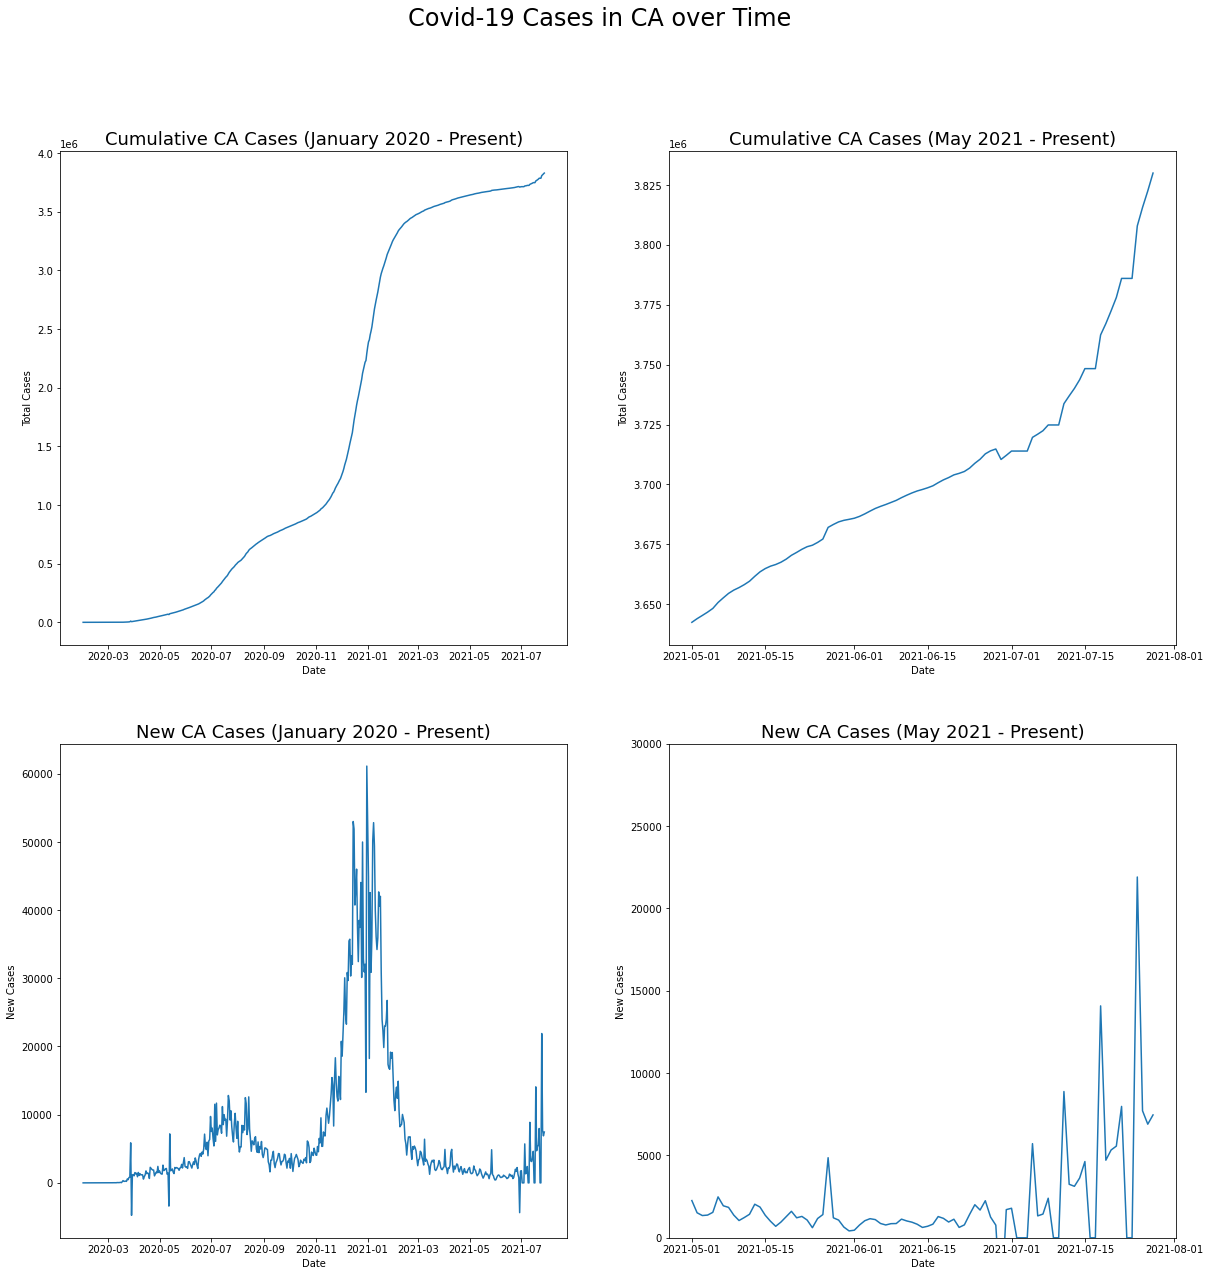

In [28]:
# Plot CA Case Data

fig, ax = plt.subplots(2, 2, figsize=(20,20))
fig.suptitle('Covid-19 Cases in CA over Time', fontsize=24)
# Total CA Cases over Time (Entire Pandemic)
ax[0][0].plot(CA_cum_cases)
ax[0][0].set_title('Cumulative CA Cases (January 2020 - Present)', fontsize=18)
ax[0][0].set_xlabel('Date')
ax[0][0].set_ylabel('Total Cases')
# Total US Cases over Time (last 3 months)
ax[0][1].plot(CA_cum_cases['2021-05':])
ax[0][1].set_title('Cumulative CA Cases (May 2021 - Present)', fontsize=18)
ax[0][1].set_xlabel('Date')
ax[0][1].set_ylabel('Total Cases')

# New CA Cases over Time (Entire Pandemic)
ax[1][0].plot(CA_new_cases)
ax[1][0].set_title('New CA Cases (January 2020 - Present)', fontsize=18)
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('New Cases')
# New CA Cases over Time (last 3 months)
ax[1][1].plot(CA_new_cases['2021-05':])
ax[1][1].set_title('New CA Cases (May 2021 - Present)', fontsize=18)
ax[1][1].set_xlabel('Date')
ax[1][1].set_ylabel('New Cases')
ax[1][1].set_ylim([0,30000])

In [29]:
# create CA aggregation of total deaths by date
CA_new_cases = by_date.reported_deaths.sum()
CA_cum_cases = by_date.cumulative_reported_deaths.sum()

# # create a 7-day moving average for new cases by date
CA_new_cases_avg = pd.Series([CA_new_cases[x-7:x].mean() for x in range(len(CA_new_cases))], index = CA_new_cases.index)

# CA Long Term and Short Term Death Trends

(0.0, 500.0)

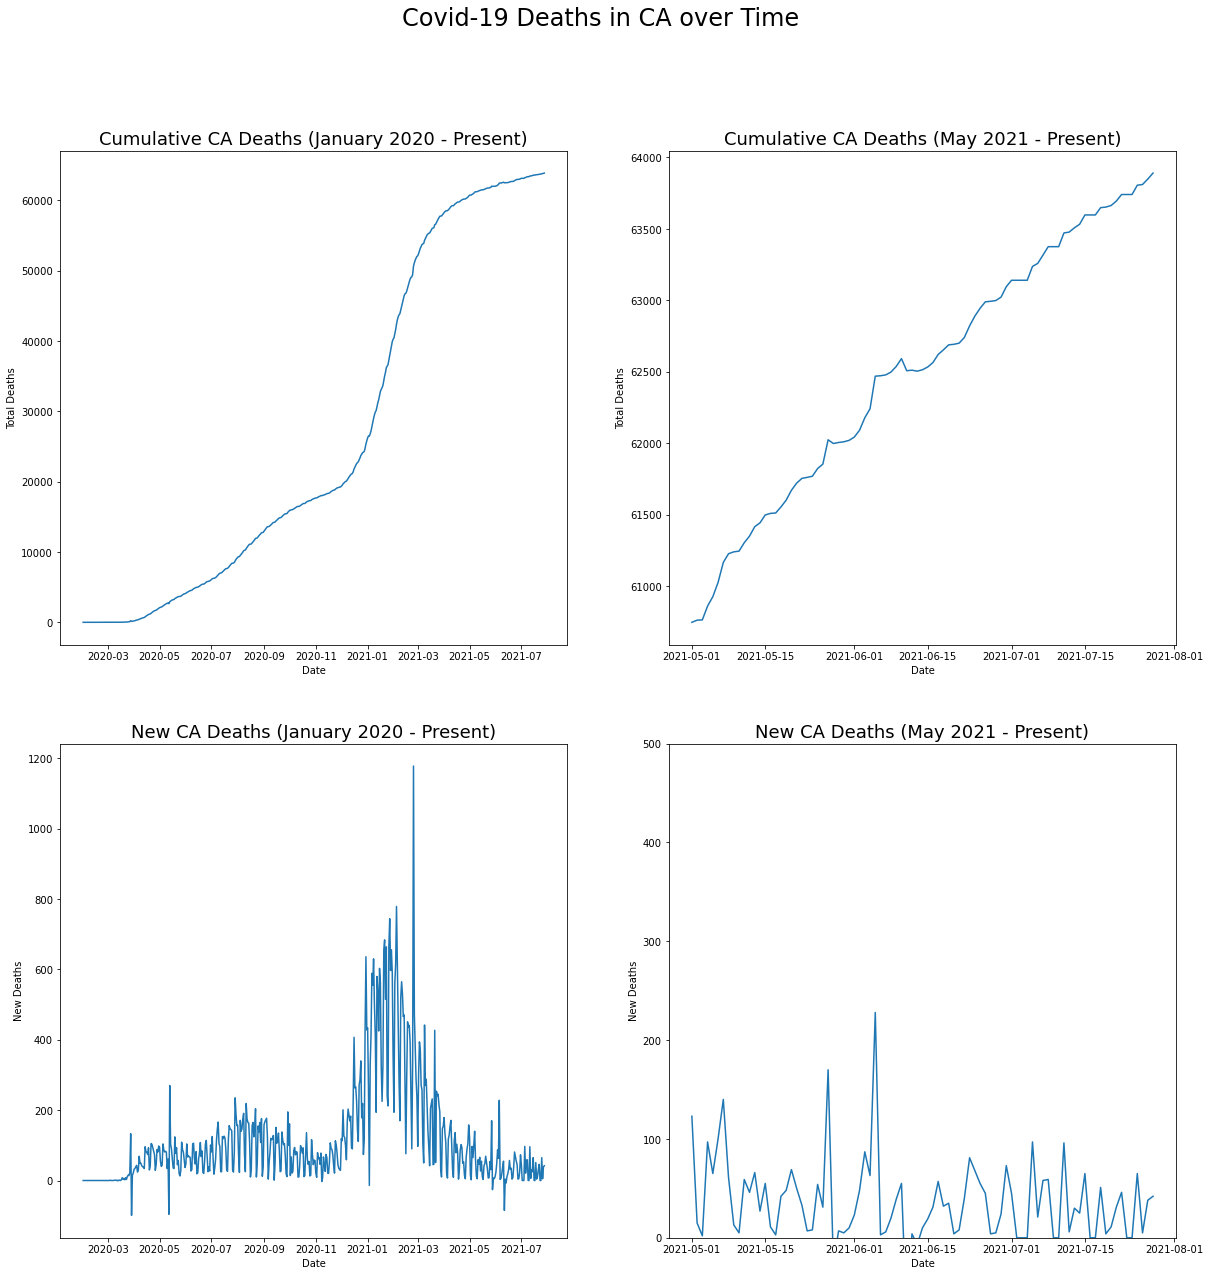

In [30]:
# Plot CA Death Data

fig, ax = plt.subplots(2, 2, figsize=(20,20))
fig.suptitle('Covid-19 Deaths in CA over Time', fontsize=24)
# Total CA Deaths over Time (Entire Pandemic)
ax[0][0].plot(CA_cum_cases)
ax[0][0].set_title('Cumulative CA Deaths (January 2020 - Present)', fontsize=18)
ax[0][0].set_xlabel('Date')
ax[0][0].set_ylabel('Total Deaths')
# Total US Cases over Time (last 3 months)
ax[0][1].plot(CA_cum_cases['2021-05':])
ax[0][1].set_title('Cumulative CA Deaths (May 2021 - Present)', fontsize=18)
ax[0][1].set_xlabel('Date')
ax[0][1].set_ylabel('Total Deaths')

# New CA Cases over Time (Entire Pandemic)
ax[1][0].plot(CA_new_cases)
ax[1][0].set_title('New CA Deaths (January 2020 - Present)', fontsize=18)
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('New Deaths')
# New CA Cases over Time (last 3 months)
ax[1][1].plot(CA_new_cases['2021-05':])
ax[1][1].set_title('New CA Deaths (May 2021 - Present)', fontsize=18)
ax[1][1].set_xlabel('Date')
ax[1][1].set_ylabel('New Deaths')
ax[1][1].set_ylim([0,500])

In [31]:
# create CA aggregation of total tests by date
CA_new_cases = by_date.reported_tests.sum()
CA_cum_cases = by_date.cumulative_total_tests.sum()


# CA Long Term and Short Term Test Trends

Text(0, 0.5, 'New Tests')

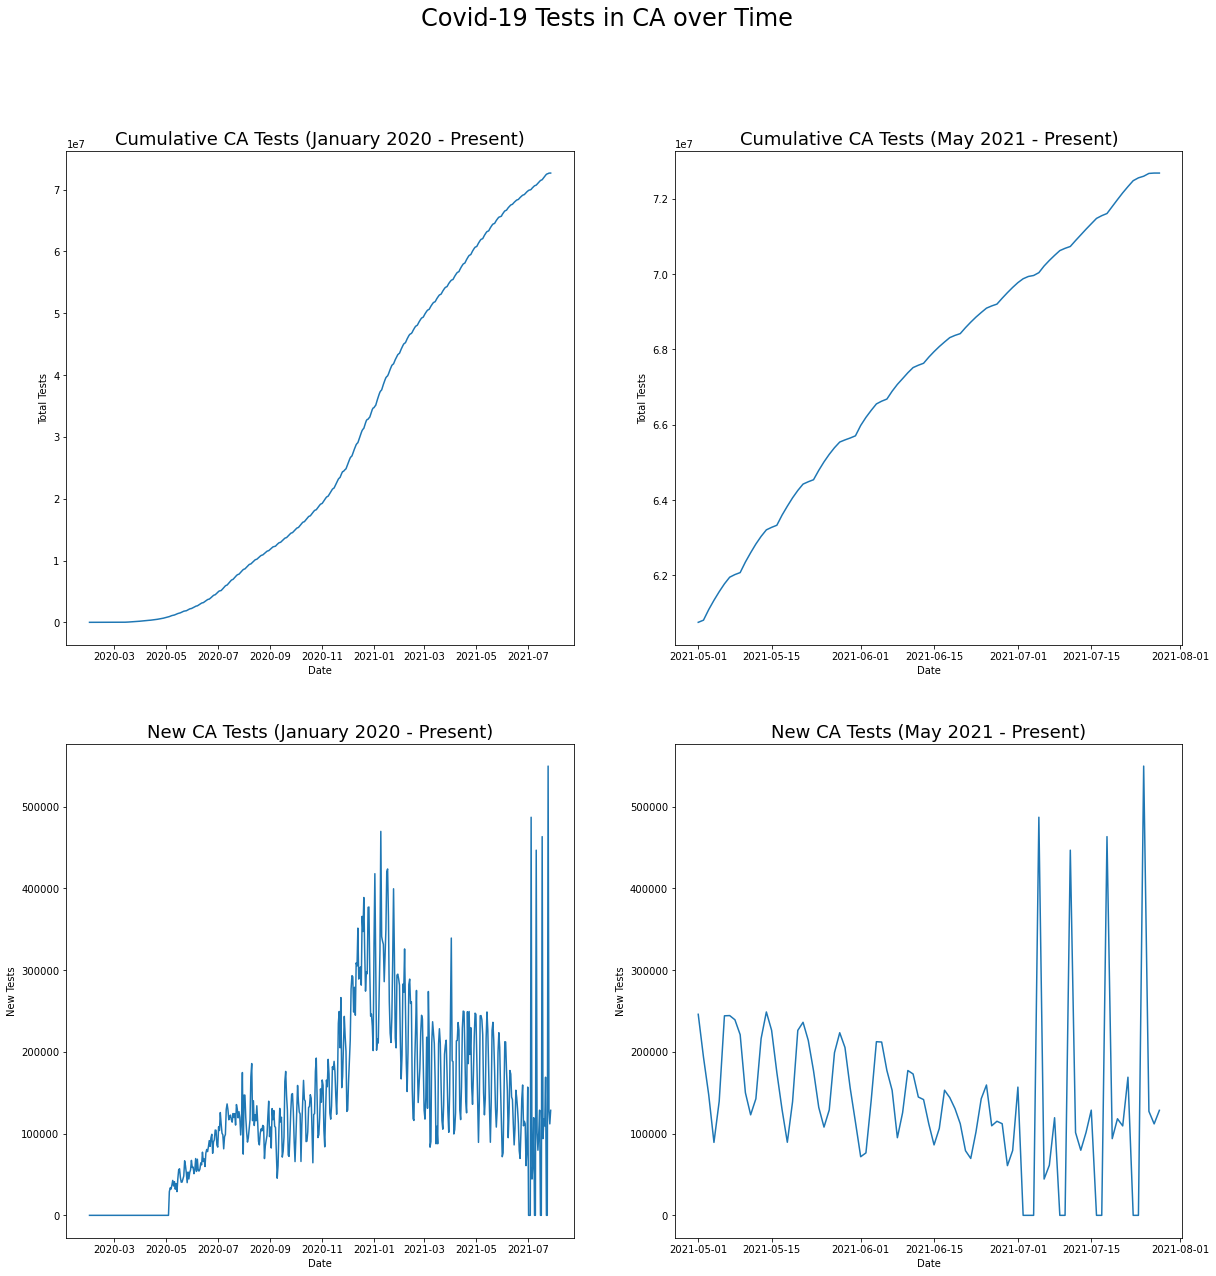

In [32]:
# Plot CA test Data

fig, ax = plt.subplots(2, 2, figsize=(20,20))
fig.suptitle('Covid-19 Tests in CA over Time', fontsize=24)
# Total CA Tests over Time (Entire Pandemic)
ax[0][0].plot(CA_cum_cases)
ax[0][0].set_title('Cumulative CA Tests (January 2020 - Present)', fontsize=18)
ax[0][0].set_xlabel('Date')
ax[0][0].set_ylabel('Total Tests')
# Total US Cases over Time (last 3 months)
ax[0][1].plot(CA_cum_cases['2021-05':])
ax[0][1].set_title('Cumulative CA Tests (May 2021 - Present)', fontsize=18)
ax[0][1].set_xlabel('Date')
ax[0][1].set_ylabel('Total Tests')

# New CA Cases over Time (Entire Pandemic)
ax[1][0].plot(CA_new_cases)
ax[1][0].set_title('New CA Tests (January 2020 - Present)', fontsize=18)
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('New Tests')
# New CA Cases over Time (last 3 months)
ax[1][1].plot(CA_new_cases['2021-05':])
ax[1][1].set_title('New CA Tests (May 2021 - Present)', fontsize=18)
ax[1][1].set_xlabel('Date')
ax[1][1].set_ylabel('New Tests')
# ax[1][1].set_ylim([0,100000])

In [33]:
# create CA aggregation of total vaccines by date
CA_new_cases = by_date.total_doses.sum()
CA_cum_cases = by_date.cumulative_total_doses.sum()

CA_cum_cases_p = by_date.cumulative_pfizer_doses.sum()
CA_cum_cases_m = by_date.cumulative_moderna_doses.sum()
CA_cum_cases_j = by_date.cumulative_jj_doses.sum()


# CA Long Term and Short Term Vaccine Trends by Manufacturer

Text(0, 0.5, 'New Count')

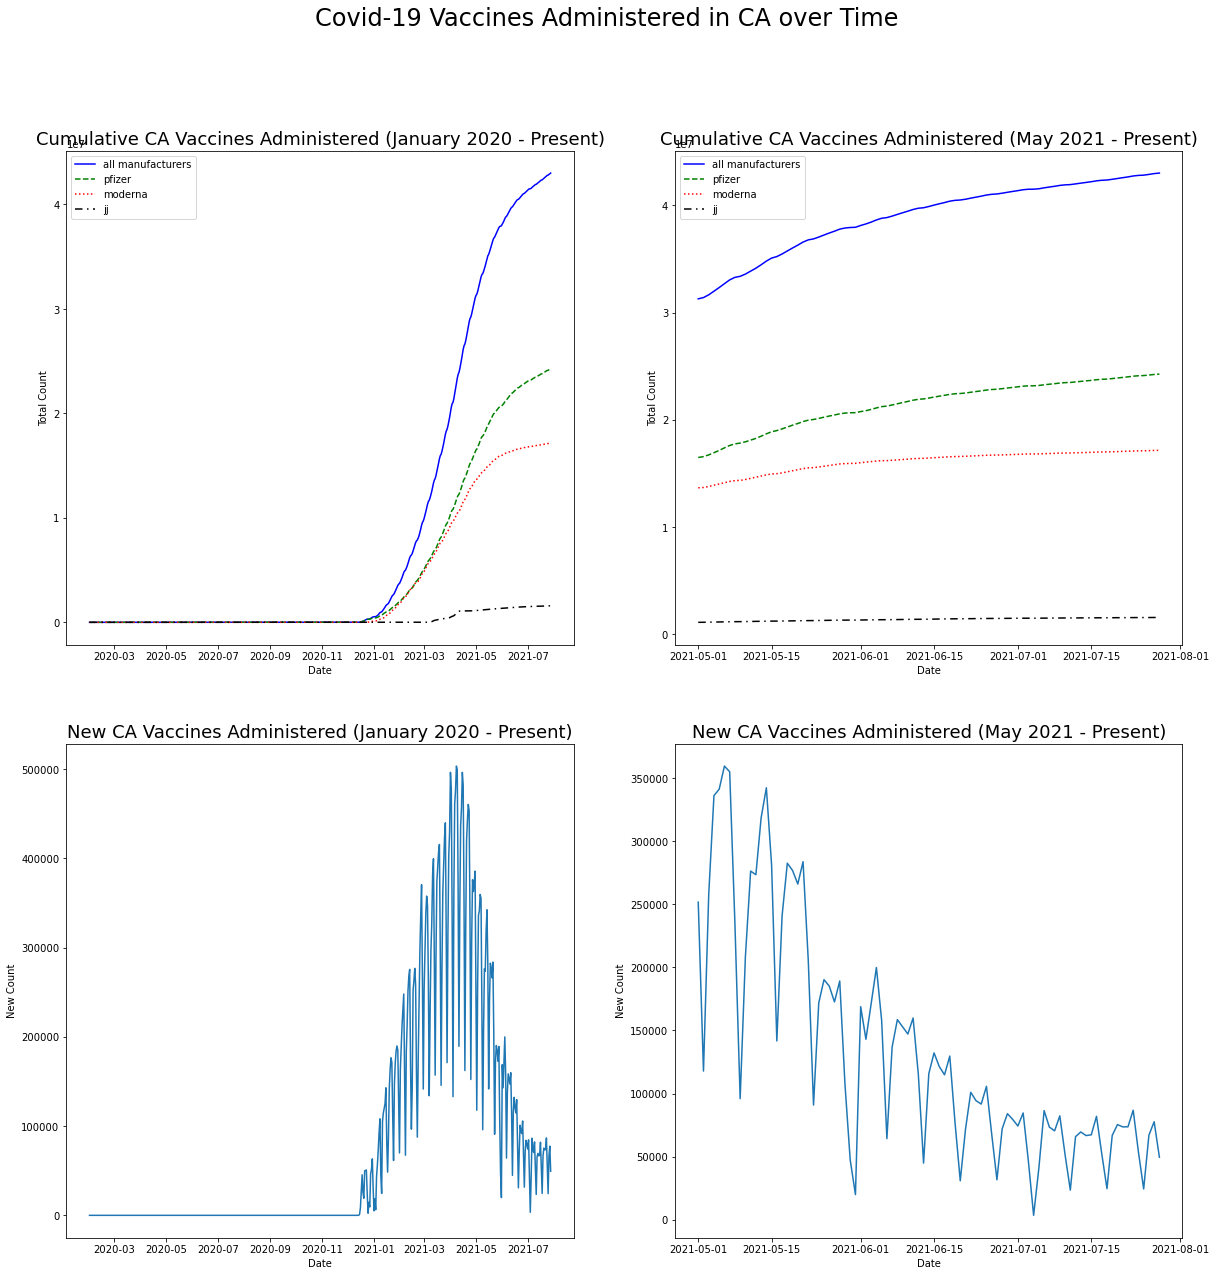

In [34]:
# Plot CA vaccine Data

fig, ax = plt.subplots(2, 2, figsize=(20,20))
fig.suptitle('Covid-19 Vaccines Administered in CA over Time', fontsize=24)
# Total CA Tests over Time (Entire Pandemic)
ax[0][0].plot(CA_cum_cases, color = 'blue', label = 'all manufacturers')
ax[0][0].plot(CA_cum_cases_p, linestyle = '--', color = 'green', label = 'pfizer' )
ax[0][0].plot(CA_cum_cases_m, linestyle = ':', color = 'red', label = 'moderna')
ax[0][0].plot(CA_cum_cases_j, linestyle = (0, (5,3,1,3)), color = 'black', label = 'jj')
ax[0][0].set_title('Cumulative CA Vaccines Administered (January 2020 - Present)', fontsize=18)
ax[0][0].set_xlabel('Date')
ax[0][0].set_ylabel('Total Count')
ax[0][0].legend()
# Total US Cases over Time (last 3 months)
ax[0][1].plot(CA_cum_cases['2021-05':],color = 'blue', label = 'all manufacturers')
ax[0][1].plot(CA_cum_cases_p['2021-05':], linestyle = '--', color = 'green', label = 'pfizer')
ax[0][1].plot(CA_cum_cases_m['2021-05':], linestyle = ':', color = 'red', label = 'moderna')
ax[0][1].plot(CA_cum_cases_j['2021-05':], linestyle = (0, (5,3,1,3)), color = 'black', label = 'jj')
ax[0][1].legend()

ax[0][1].set_title('Cumulative CA Vaccines Administered (May 2021 - Present)', fontsize=18)
ax[0][1].set_xlabel('Date')
ax[0][1].set_ylabel('Total Count')

# New CA Cases over Time (Entire Pandemic)
ax[1][0].plot(CA_new_cases)
ax[1][0].set_title('New CA Vaccines Administered (January 2020 - Present)', fontsize=18)
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('New Count')
# New CA Cases over Time (last 3 months)
ax[1][1].plot(CA_new_cases['2021-05':])
ax[1][1].set_title('New CA Vaccines Administered (May 2021 - Present)', fontsize=18)
ax[1][1].set_xlabel('Date')
ax[1][1].set_ylabel('New Count')
# ax[1][1].set_ylim([0,100000])

In [35]:
# create CA aggregation of daily patient counts and ICU Beds
CA_new_cases_1 = by_date.hospitalized_covid_confirmed_patients.sum()
CA_new_cases_2 = by_date.icu_available_beds.sum()

# CA Long Term and Short Term Hospitalization Trends

Text(0, 0.5, 'Total Count')

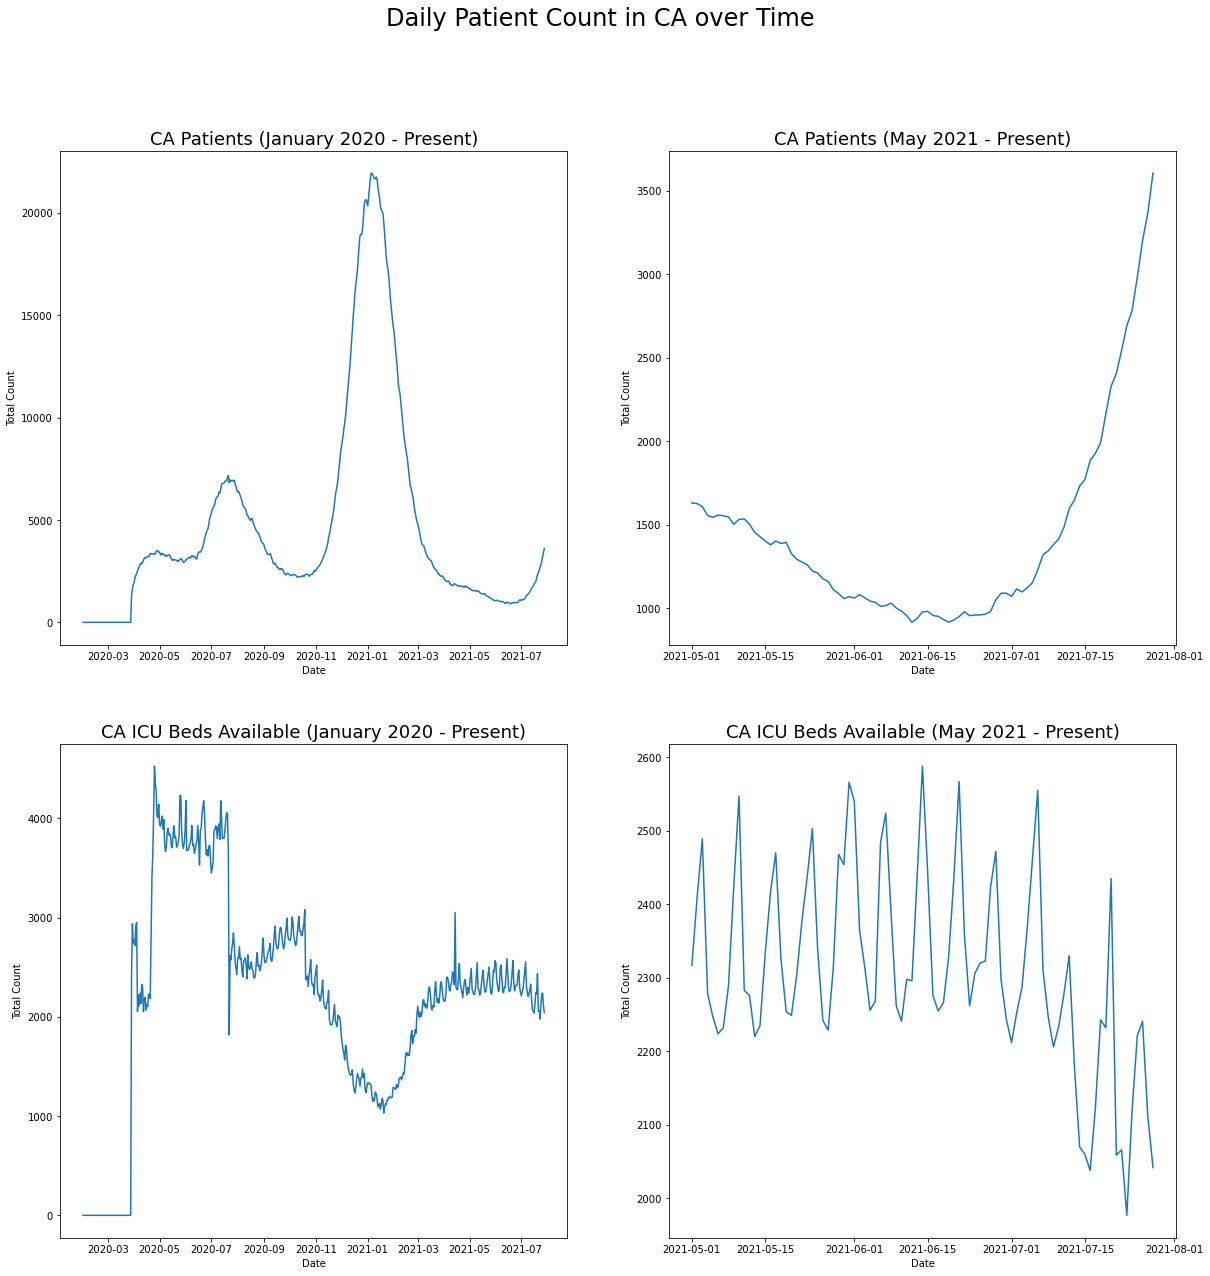

In [36]:
# Plot CA Patient Count and ICU Beds

fig, ax = plt.subplots(2, 2, figsize=(20,20))
fig.suptitle('Daily Patient Count in CA over Time', fontsize=24)
# CA Patients over Time (Entire Pandemic)
ax[0][0].plot(CA_new_cases_1)
ax[0][0].set_title('CA Patients (January 2020 - Present)', fontsize=18)
ax[0][0].set_xlabel('Date')
ax[0][0].set_ylabel('Total Count')
# over Time (last 3 months)
ax[0][1].plot(CA_new_cases_1['2021-05':])
ax[0][1].set_title('CA Patients (May 2021 - Present)', fontsize=18)
ax[0][1].set_xlabel('Date')
ax[0][1].set_ylabel('Total Count')

# ICU Beds available over Time (Entire Pandemic)
ax[1][0].plot(CA_new_cases_2)
ax[1][0].set_title('CA ICU Beds Available (January 2020 - Present)', fontsize=18)
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('Total Count')
# New CA Cases over Time (last 3 months)
ax[1][1].plot(CA_new_cases_2['2021-05':])
ax[1][1].set_title('CA ICU Beds Available (May 2021 - Present)', fontsize=18)
ax[1][1].set_xlabel('Date')
ax[1][1].set_ylabel('Total Count')
# ax[1][1].set_ylim([0,30000])

In [37]:
# create cross correlation visual between cases and death
CA_new_cases_1 = by_date.reported_deaths.sum()
CA_new_cases_2 = by_date.reported_cases.sum()
CA_new_cases_3 = by_date.total_doses.sum()
CA_new_cases_4 = by_date.hospitalized_covid_confirmed_patients.sum()

# CA Short Term Visual Correlation Trends

Text(0, 0.5, 'Total Count')

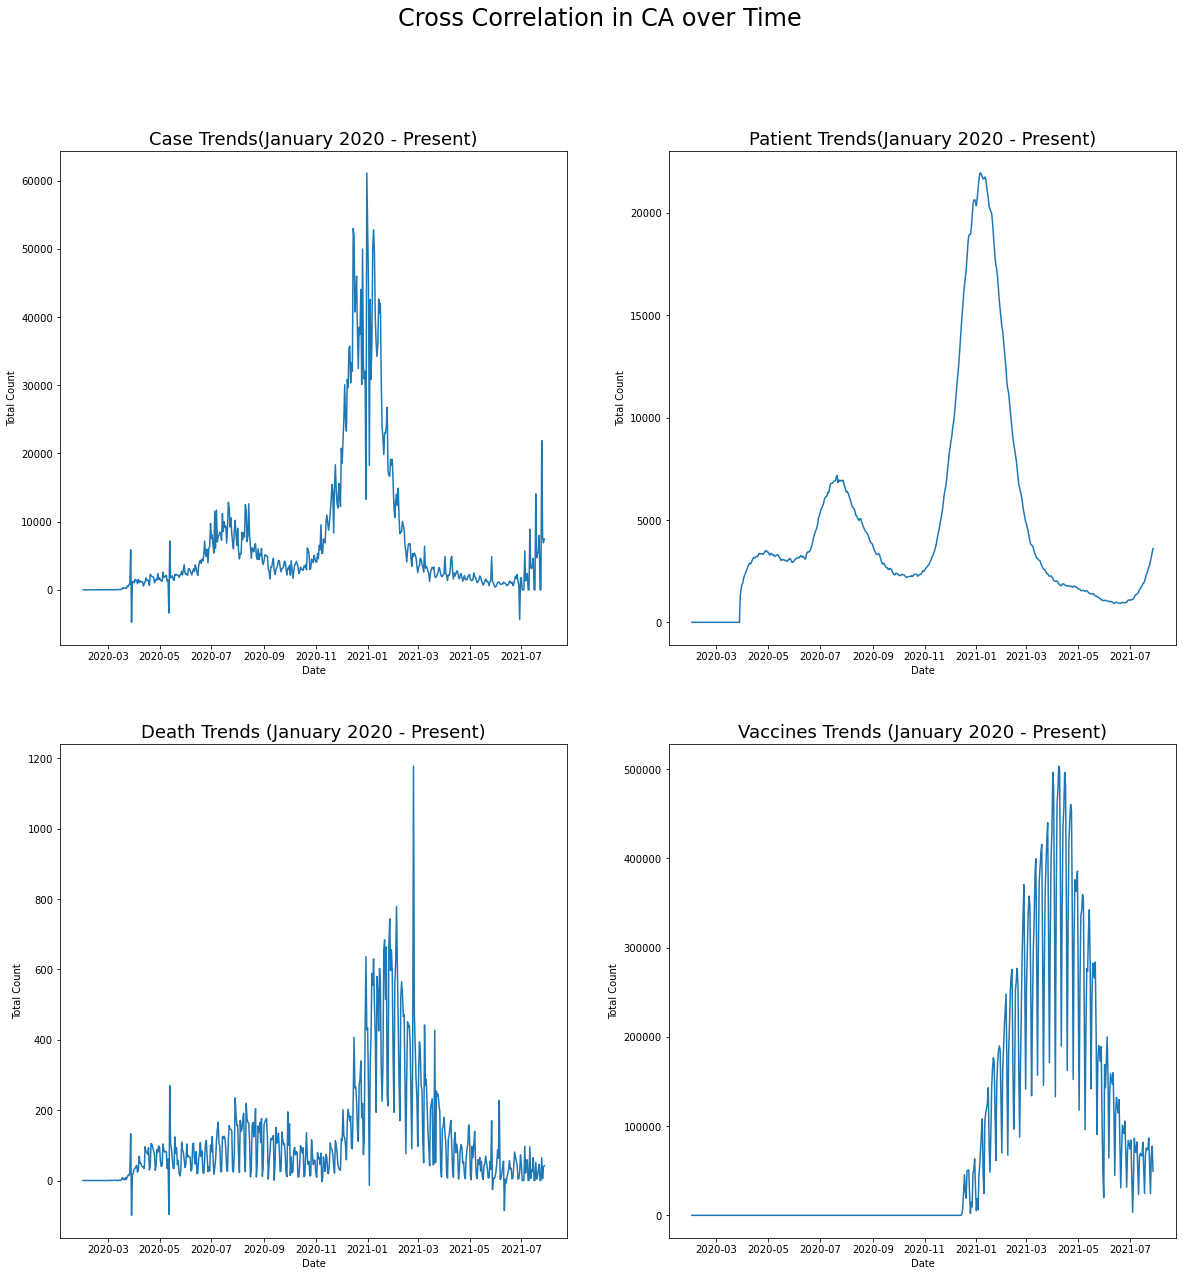

In [38]:
# Plot Cross Correlation Visual Graphs

fig, ax = plt.subplots(2, 2, figsize=(20,20))
fig.suptitle('Cross Correlation in CA over Time', fontsize=24)
# CA Cases Versus Deaths over Time (Entire Pandemic)
ax[0][0].plot(CA_new_cases_2)
ax[0][0].set_title('Case Trends(January 2020 - Present)', fontsize=18)
ax[0][0].set_xlabel('Date')
ax[0][0].set_ylabel('Total Count')

ax[1][0].plot(CA_new_cases_1)
ax[1][0].set_title('Death Trends (January 2020 - Present)', fontsize=18)
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('Total Count')

# CA Hospitalization Versus Vaccines over Time (Entire Pandemic)
ax[0][1].plot(CA_new_cases_4)
ax[0][1].set_title('Patient Trends(January 2020 - Present)', fontsize=18)
ax[0][1].set_xlabel('Date')
ax[0][1].set_ylabel('Total Count')

ax[1][1].plot(CA_new_cases_3)
ax[1][1].set_title('Vaccines Trends (January 2020 - Present)', fontsize=18)
ax[1][1].set_xlabel('Date')
ax[1][1].set_ylabel('Total Count')



In [39]:
#  Correlation Matrix for Cases, Deaths, Doses, Hospitalizations for Wave 1: Beginning of Pandemic to '2020-04'

CA_new_cases_1 = by_date.reported_deaths.sum()
CA_new_cases_2 = by_date.reported_cases.sum()
# CA_new_cases_3 = by_date.total_doses.sum()
CA_new_cases_4 = by_date.hospitalized_covid_confirmed_patients.sum()
d = {'CA_new_deaths': CA_new_cases_1[:'2020-04'], 'CA_new_cases': CA_new_cases_2[:'2020-04'], 'CA_new_patients': CA_new_cases_4[:'2020-04']}
CA_df = pd.DataFrame(data=d)

print("Correlation Coefficient for Wave 1: [Beginning - April, 2020]")
CA_df.corr()

Correlation Coefficient for Wave 1: [Beginning - April, 2020]


,CA_new_deaths,CA_new_cases,CA_new_patients
CA_new_deaths,1.000000,0.872982,0.754541
CA_new_cases,0.872982,1.000000,0.547829
CA_new_patients,0.754541,0.547829,1.000000


In [40]:
#  Correlation Matrix for Cases, Deaths, Doses, Hospitalizations for Wave 2: '2020-04' to '2020-17'

CA_new_cases_1 = by_date.reported_deaths.sum()
CA_new_cases_2 = by_date.reported_cases.sum()
# CA_new_cases_3 = by_date.total_doses.sum()
CA_new_cases_4 = by_date.hospitalized_covid_confirmed_patients.sum()
d = {'CA_new_deaths': CA_new_cases_1['2020-04':'2020-08'], 'CA_new_cases': CA_new_cases_2['2020-04':'2020-08'], 'CA_new_patients': CA_new_cases_4['2020-04':'2020-08']}
CA_df = pd.DataFrame(data=d)

print("Correlation Coefficient for Wave 2: [April, 2020 - August, 2020]")
CA_df.corr()

Correlation Coefficient for Wave 2: [April, 2020 - August, 2020]


,CA_new_deaths,CA_new_cases,CA_new_patients
CA_new_deaths,1.000000,0.506798,0.367611
CA_new_cases,0.506798,1.000000,0.862122
CA_new_patients,0.367611,0.862122,1.000000


In [50]:
#  Correlation Matrix for Cases, Deaths, Doses, Hospitalizations for Wave 3: '2020-7' to '2021-02'

CA_new_cases_1 = by_date.reported_deaths.sum()
CA_new_cases_2 = by_date.reported_cases.sum()
# CA_new_cases_3 = by_date.total_doses.sum()
CA_new_cases_4 = by_date.hospitalized_covid_confirmed_patients.sum()
d = {'CA_new_deaths': CA_new_cases_1['2020-08':'2021-02'], 'CA_new_cases': CA_new_cases_2['2020-08':'2021-02'], 'CA_new_patients': CA_new_cases_4['2020-08':'2021-02']}
CA_df = pd.DataFrame(data=d)

print("Correlation Coefficient for Wave 3: [August, 2020 - February, 2021]")
CA_df.corr()

Correlation Coefficient for Wave 3: [August, 2020 - February, 2021]


,CA_new_deaths,CA_new_cases,CA_new_patients
CA_new_deaths,1.000000,0.410367,0.576236
CA_new_cases,0.410367,1.000000,0.765986
CA_new_patients,0.576236,0.765986,1.000000


In [51]:
#  Correlation Matrix for impact of vaccinations '2021-02 to Current'

CA_new_cases_1 = by_date.reported_deaths.sum()
CA_new_cases_2 = by_date.reported_cases.sum()
CA_new_cases_3 = by_date.total_doses.sum()
CA_new_cases_4 = by_date.hospitalized_covid_confirmed_patients.sum()
d = {'CA_new_doses': CA_new_cases_3['2021-02':],'CA_new_deaths': CA_new_cases_1['2021-02':], 'CA_new_cases': CA_new_cases_2['2021-02':], 'CA_new_patients': CA_new_cases_4['2021-02':]}
CA_df = pd.DataFrame(data=d)

print("Correlation Coefficient for Impact of Vaccinations: [February, 2021 - Current]")
CA_df.corr()

Correlation Coefficient for Impact of Vaccinations: [February, 2021 - Current]


,CA_new_doses,CA_new_deaths,CA_new_cases,CA_new_patients
CA_new_doses,1.000000,0.430582,-0.070192,0.101432
CA_new_deaths,0.430582,1.000000,0.396718,0.560133
CA_new_cases,-0.070192,0.396718,1.000000,0.653514
CA_new_patients,0.101432,0.560133,0.653514,1.000000


# CA County Drill Down

Text(0, 0.5, 'Total Count')

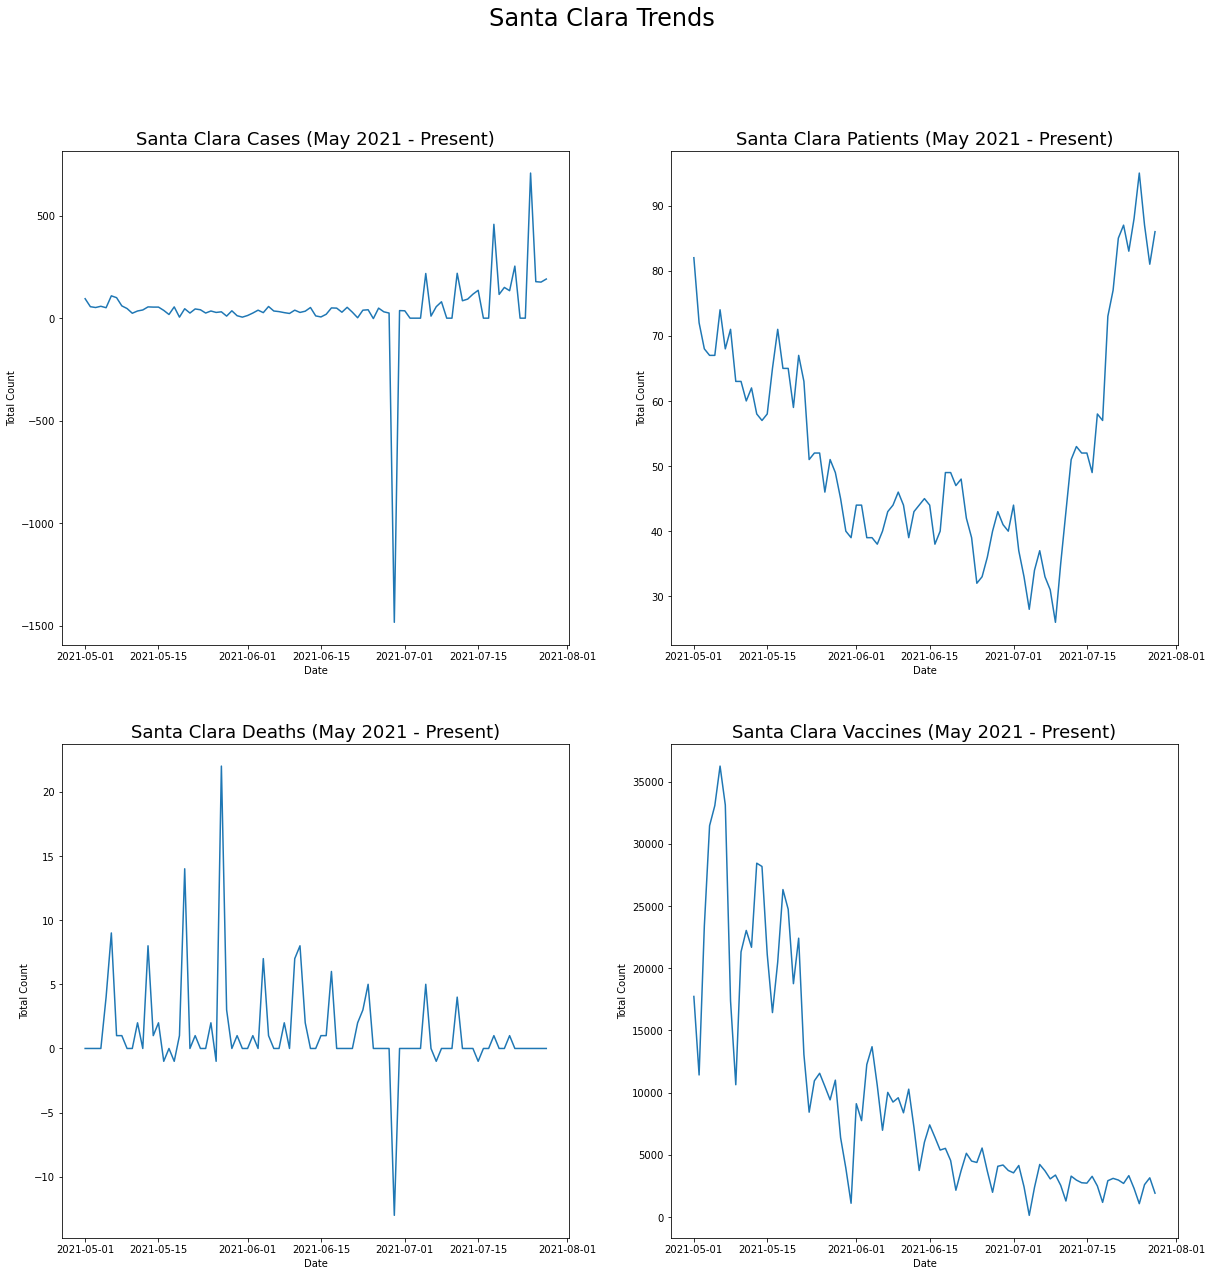

In [43]:
# Santa Clara Drill Down

by_county = merge_clean_data[merge_clean_data['area'] == 'Santa Clara']
by_date = by_county.groupby('date')

CA_new_cases_1 = by_date.reported_cases.sum()
CA_new_cases_2 = by_date.reported_deaths.sum()
CA_new_cases_3 = by_date.total_doses.sum()
CA_new_cases_4 = by_date.hospitalized_covid_confirmed_patients.sum()

fig, ax = plt.subplots(2, 2, figsize=(20,20))
fig.suptitle('Santa Clara Trends', fontsize=24)

ax[0][0].plot(CA_new_cases_1['2021-05':])
ax[0][0].set_title('Santa Clara Cases (May 2021 - Present)', fontsize=18)
ax[0][0].set_xlabel('Date')
ax[0][0].set_ylabel('Total Count')

ax[0][1].plot(CA_new_cases_4['2021-05':])
ax[0][1].set_title('Santa Clara Patients (May 2021 - Present)', fontsize=18)
ax[0][1].set_xlabel('Date')
ax[0][1].set_ylabel('Total Count')

ax[1][0].plot(CA_new_cases_2['2021-05':])
ax[1][0].set_title('Santa Clara Deaths (May 2021 - Present)', fontsize=18)
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('Total Count')

ax[1][1].plot(CA_new_cases_3['2021-05':])
ax[1][1].set_title('Santa Clara Vaccines (May 2021 - Present)', fontsize=18)
ax[1][1].set_xlabel('Date')
ax[1][1].set_ylabel('Total Count')

Text(0, 0.5, 'Total Count')

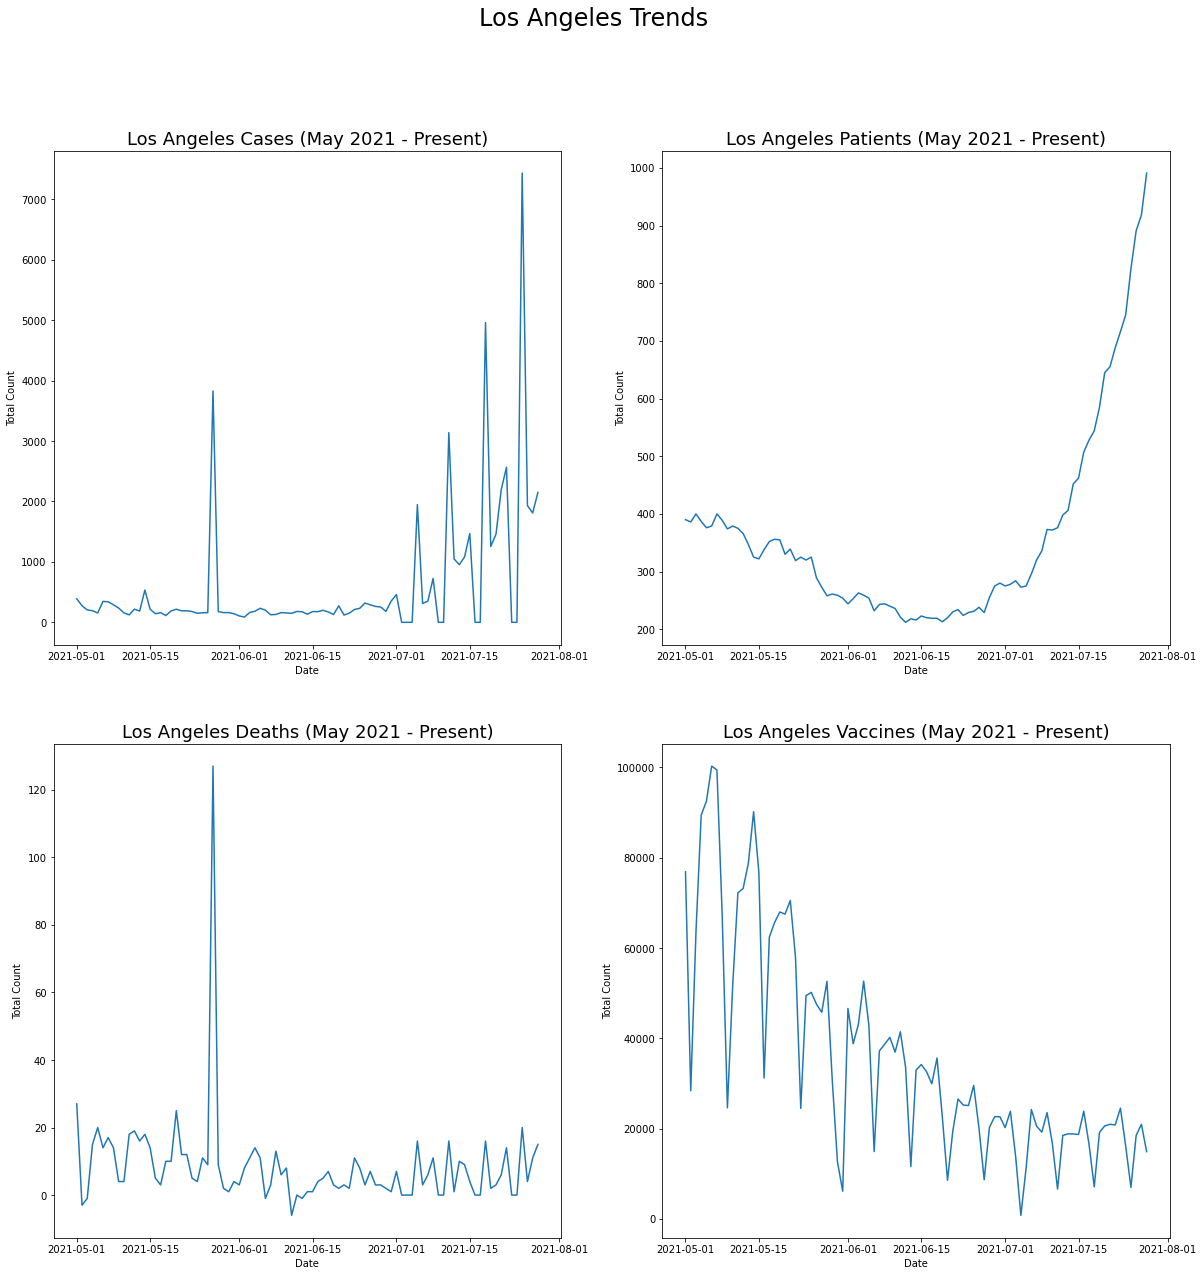

In [44]:
# Los Angeles Drill Down

by_county = merge_clean_data[merge_clean_data['area'] == 'Los Angeles']
by_date = by_county.groupby('date')

CA_new_cases_1 = by_date.reported_cases.sum()
CA_new_cases_2 = by_date.reported_deaths.sum()
CA_new_cases_3 = by_date.total_doses.sum()
CA_new_cases_4 = by_date.hospitalized_covid_confirmed_patients.sum()

fig, ax = plt.subplots(2, 2, figsize=(20,20))
fig.suptitle('Los Angeles Trends', fontsize=24)

ax[0][0].plot(CA_new_cases_1['2021-05':])
ax[0][0].set_title('Los Angeles Cases (May 2021 - Present)', fontsize=18)
ax[0][0].set_xlabel('Date')
ax[0][0].set_ylabel('Total Count')

ax[0][1].plot(CA_new_cases_4['2021-05':])
ax[0][1].set_title('Los Angeles Patients (May 2021 - Present)', fontsize=18)
ax[0][1].set_xlabel('Date')
ax[0][1].set_ylabel('Total Count')

ax[1][0].plot(CA_new_cases_2['2021-05':])
ax[1][0].set_title('Los Angeles Deaths (May 2021 - Present)', fontsize=18)
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('Total Count')

ax[1][1].plot(CA_new_cases_3['2021-05':])
ax[1][1].set_title('Los Angeles Vaccines (May 2021 - Present)', fontsize=18)
ax[1][1].set_xlabel('Date')
ax[1][1].set_ylabel('Total Count')

Text(0, 0.5, 'Total Count')

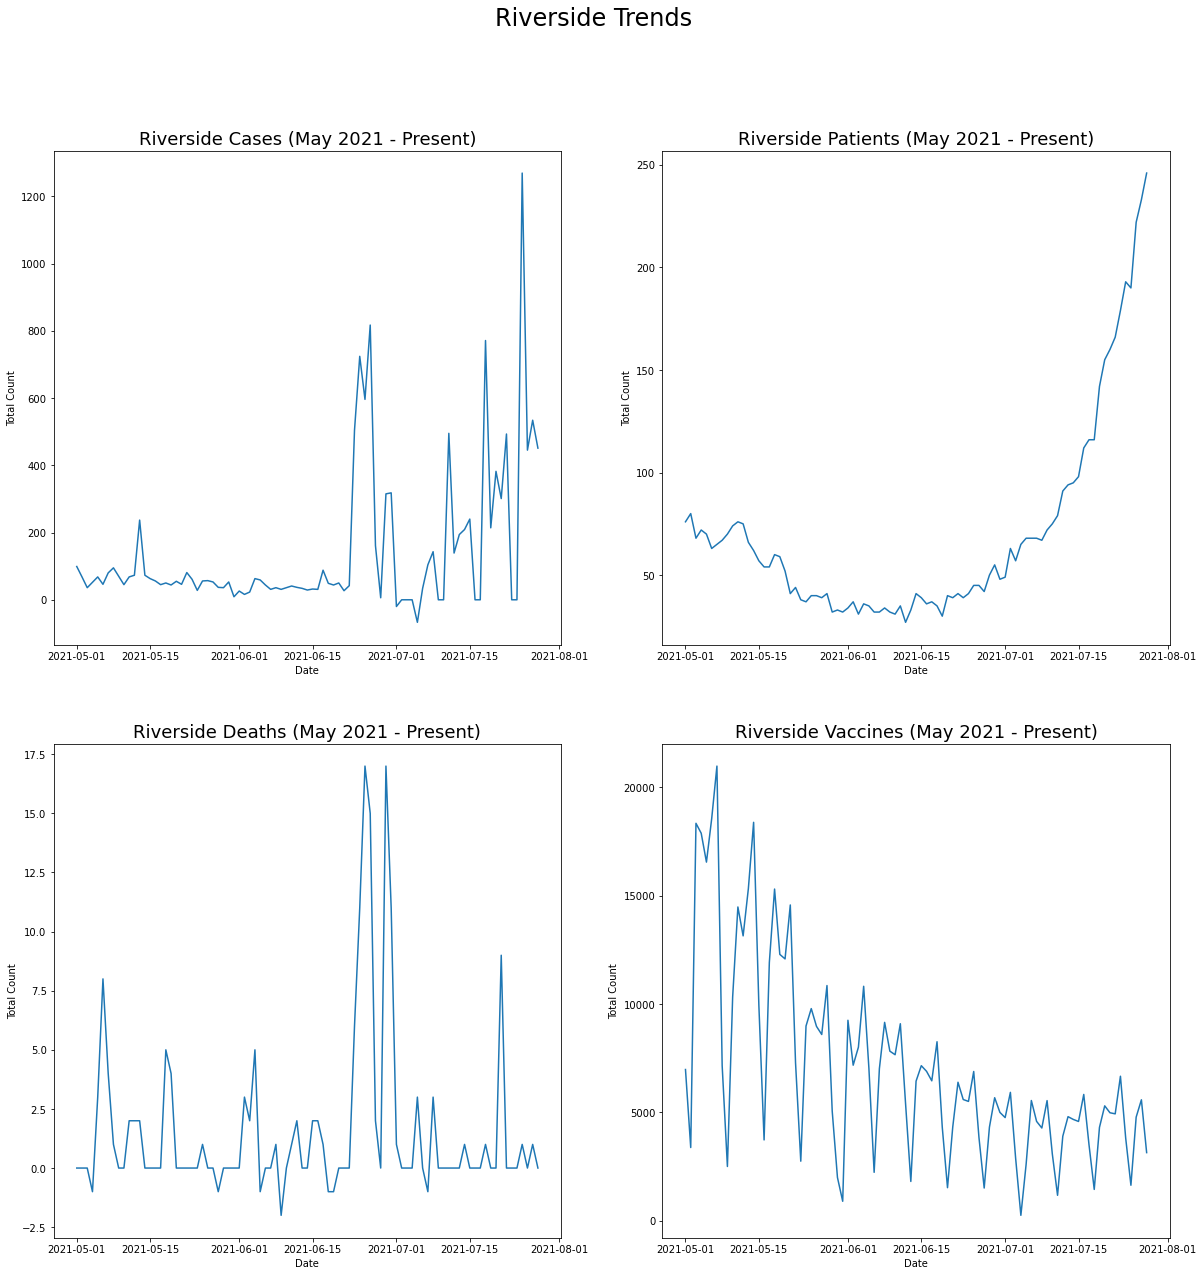

In [45]:
# Riverside Drill Down

by_county = merge_clean_data[merge_clean_data['area'] == 'Riverside']
by_date = by_county.groupby('date')

CA_new_cases_1 = by_date.reported_cases.sum()
CA_new_cases_2 = by_date.reported_deaths.sum()
CA_new_cases_3 = by_date.total_doses.sum()
CA_new_cases_4 = by_date.hospitalized_covid_confirmed_patients.sum()

fig, ax = plt.subplots(2, 2, figsize=(20,20))
fig.suptitle('Riverside Trends', fontsize=24)

ax[0][0].plot(CA_new_cases_1['2021-05':])
ax[0][0].set_title('Riverside Cases (May 2021 - Present)', fontsize=18)
ax[0][0].set_xlabel('Date')
ax[0][0].set_ylabel('Total Count')

ax[0][1].plot(CA_new_cases_4['2021-05':])
ax[0][1].set_title('Riverside Patients (May 2021 - Present)', fontsize=18)
ax[0][1].set_xlabel('Date')
ax[0][1].set_ylabel('Total Count')

ax[1][0].plot(CA_new_cases_2['2021-05':])
ax[1][0].set_title('Riverside Deaths (May 2021 - Present)', fontsize=18)
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('Total Count')

ax[1][1].plot(CA_new_cases_3['2021-05':])
ax[1][1].set_title('Riverside Vaccines (May 2021 - Present)', fontsize=18)
ax[1][1].set_xlabel('Date')
ax[1][1].set_ylabel('Total Count')